<a href="https://colab.research.google.com/github/jungwoo1208/AI_Study/blob/main/mlp_number.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


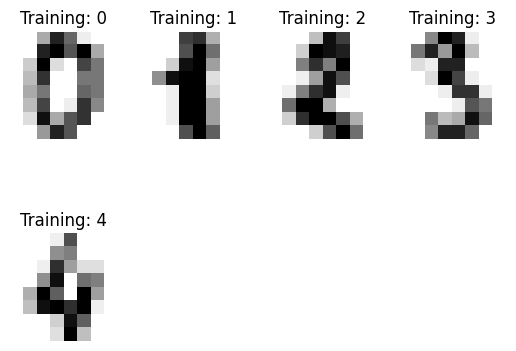

In [3]:
images_andlabels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_andlabels[:5]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [4]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [5]:
x= digits.data
y= digits.target

In [6]:
import torch
import torch.nn as nn
from torch import optim

In [7]:
model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [9]:
x=torch.tensor(x,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.int64)

In [10]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [11]:
losses = []

In [12]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(x)
  loss = loss_fn(y_pred,y)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch %d: loss %.4f' % (epoch, loss.item()))

  losses.append(loss.item())

Epoch 0: loss 2.3999
Epoch 10: loss 2.0418
Epoch 20: loss 1.7353
Epoch 30: loss 1.4491
Epoch 40: loss 1.1516
Epoch 50: loss 0.8436
Epoch 60: loss 0.6057
Epoch 70: loss 0.4369
Epoch 80: loss 0.3228
Epoch 90: loss 0.2482


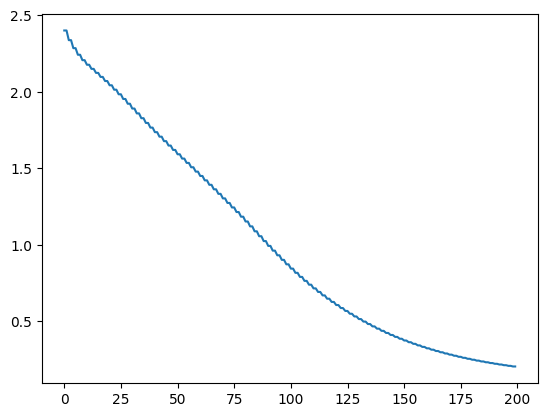

In [13]:
plt.plot(losses)